## 1. Importing Libraries

In [67]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 2.Loading Data and understanding it

In [68]:
from google.colab import files
import io
uploaded=files.upload()
df = pd.read_csv(io.BytesIO(uploaded['day.csv']))

Saving day.csv to day (1).csv


In [69]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [70]:
df.shape
#dataset has 16 columns and 730 rows

(730, 16)

In [71]:
df.info()
#dataset doesn't contain any null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [72]:
#analyzing the data type of columns
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# 3. Exploratory data analysis

In [73]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [74]:
#Analyzing instant
df.instant.nunique()
#Since it has unique values from 1 to 730, its not useful for analysis. Hence Drop instant

730

In [75]:
df.drop(['instant'],axis=1,inplace=True)

In [76]:
#Season - 4 types
df.season.value_counts()
#values are symmetrically distributed hence no data cleaning required. However data type is numerical but its categorical we will handle it accordingly

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [77]:
#Dropping the casual and registered Coloumns are the Cnt is the sum of two columns so in this interdepency will be reduced
df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

In [78]:
#Create a new variable "age" to indicate how old the business is
df['age'] = (pd.to_datetime(df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [79]:
df.head()
#to check if our operations are taken place

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [80]:
#since age is derived from dteday drop the column to avoid interdependency
df.drop(['dteday'], axis = 1, inplace = True)

In [81]:
df.nunique()
#find the number of unique items of each columns

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
age           730
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  age         730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


We  can see that the Columns like Season, yr,mnth,holiday,weekday,workingday,weathersit have very few unique values meaning they should be categorical columns but here they are treated as interger (numerical)

Also there are no missing values in each column

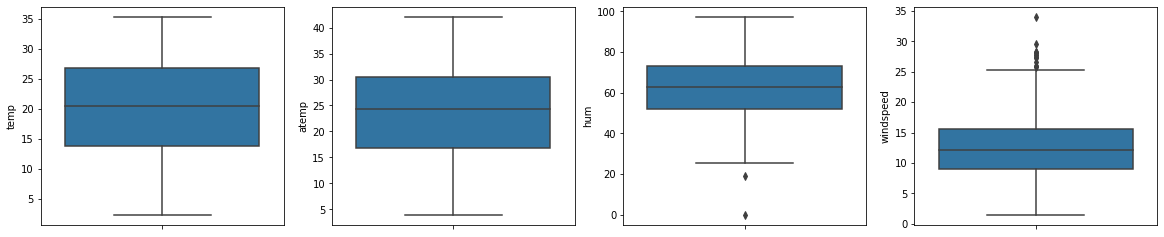

In [83]:
#Analyzing the numerical columns for any outliers
num_col = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,4))

i = 1
for col in num_col:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

In [84]:
#humidity has outlier lets analyze
df[df.hum<25]
#humidity  zero is not possible so drop the record and also humidity of 18 is far from the min value as per box plot hence drop
#also it has windspeed greater than 30 which is again a outlier as per the box plot

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
49,1,0,2,0,1,1,1,16.365847,19.5702,18.7917,34.000021,1635,49
68,1,0,3,0,6,0,3,15.952731,19.2834,0.0000,17.545759,623,68


In [85]:
df = df[~(df.hum<25)]

In [86]:
df[df.windspeed>30]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age


Now the data is cleaned

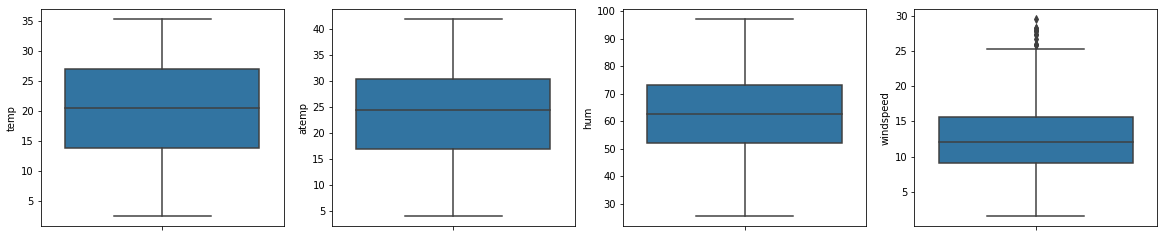

In [87]:
#Lets analyze the boxplots again
num_col = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,4))

i = 1
for col in num_col:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

Hence no outlier now, the windspeed outlier values are close to max value and is in continuous

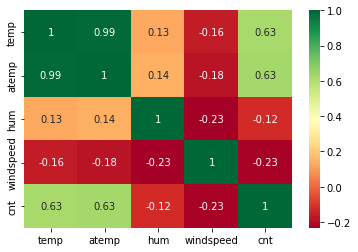

In [88]:
# Checking numerical variables relationship with each other
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='RdYlGn', annot = True)
plt.show()

In [89]:
#temp and atemp are higly correlated hence it may hinder our model. atemp must have been derived from temp so drop the atemp
df.drop(['atemp'], axis = 1, inplace = True)

<Figure size 1080x2160 with 0 Axes>

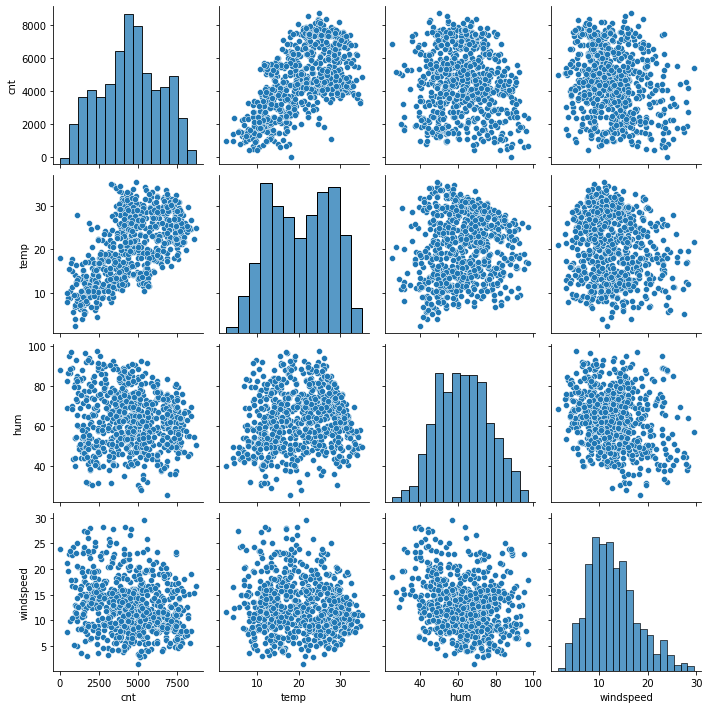

In [90]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'hum','windspeed'])
plt.show()

Inference : Temperature seems to be linearly correlated with target variable

Analyzing Categorical Data against the Target variable

In [91]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,age
0,spring,0,jan,0,mon,1,moderate,14.110847,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,43.6957,12.522300,1600,4


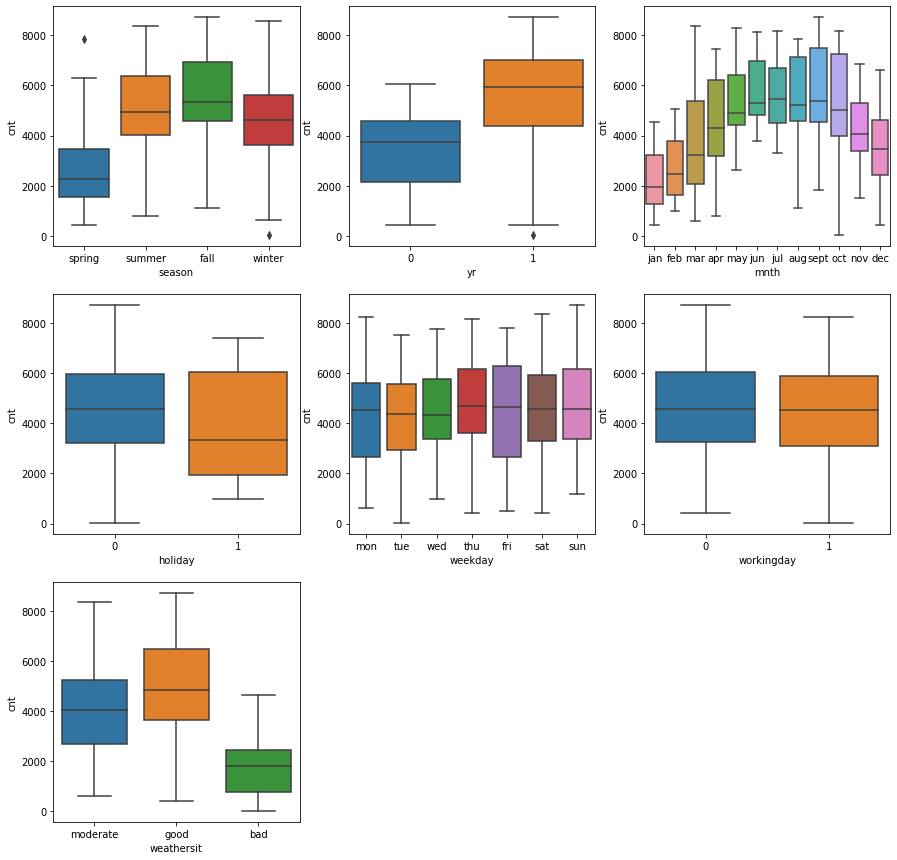

In [92]:
# Boxplot for categorical variables to see the trend
cat_col = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(cat_col):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

Inferences:
1) Season: 3:fall has highest demand for rental bikes
2) demand for next year has grown
3) Demand is at peak in Sep. It grows from Jan to Sep and then drop till dec
4) Demand is low in holidays
5) Weekday is not impacting the outcome as much
6) The clear weathershit has highest demand

#4.MODELLING DATA PREPARATION

4.1 Creating Dummies

In [93]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True) #(p-1) dummies can explain p categories
df = pd.get_dummies(data=df,columns=["weathersit"])
#In weathersit first column was not dropped so as we need info about severe weather situation

In [94]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,age,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,80.5833,10.749882,985,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [95]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'age',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

4.2 spliting the data for modelling

In [96]:
y=df.pop('cnt')
#y is our target/dependent variable

#X contains all dependent variables
X=df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,age,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,80.5833,10.749882,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,2,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,3,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,4,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [98]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(509, 30)
(219, 30)


4.3 Scaling Numerical Variables

In [99]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [100]:
num_var = ['temp','hum','windspeed','age']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_var] = scaler.fit_transform(X_train[num_var])

In [101]:
#Inspecting stats Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,age,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,0.516699,0.035363,0.681729,0.554255,0.525896,0.419999,0.508259,0.229862,0.261297,0.243615,...,0.084479,0.153242,0.129666,0.159136,0.135560,0.133595,0.149312,0.027505,0.626719,0.345776
std,0.500213,0.184878,0.466264,0.225937,0.193654,0.190578,0.288337,0.421158,0.439773,0.429685,...,0.278379,0.360575,0.336266,0.366162,0.342657,0.340552,0.356747,0.163710,0.484152,0.476089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354130,0.384571,0.278404,0.257888,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.576343,0.531322,0.396554,0.518519,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.747675,0.666474,0.536520,0.758573,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,age,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
584,1,0,1,0.860857,0.582947,0.220835,0.801097,0,0,0,...,0,0,0,0,1,0,0,0,0,1
710,1,0,1,0.297020,0.395591,0.351466,0.973937,0,0,1,...,0,0,0,0,1,0,0,0,0,1
331,0,0,1,0.553679,0.680570,0.299413,0.454047,0,0,1,...,0,0,0,0,0,0,1,0,1,0
453,1,0,0,0.387359,0.454756,0.289273,0.621399,0,1,0,...,0,0,1,0,0,0,0,0,0,1
106,0,0,1,0.495350,0.313804,0.702966,0.145405,0,1,0,...,0,0,0,0,0,1,0,0,1,0


#5.DATA MODELLING WITH RFE APPROACH

In [103]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [104]:
#Cutting down the number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)

In [105]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [106]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('age', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', False, 5),
 ('mnth_aug', True, 1),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 15),
 ('mnth_jan', False, 4),
 ('mnth_jul', False, 13),
 ('mnth_jun', False, 3),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 2),
 ('mnth_nov', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 6),
 ('weekday_sat', False, 11),
 ('weekday_sun', False, 16),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 8),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 9)]

Manual Functions for Building Models

In [107]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [108]:
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [109]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'age', 'season_spring',
       'mnth_aug', 'mnth_dec', 'mnth_mar', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [110]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'age', 'season_spring',
       'mnth_aug', 'mnth_dec', 'mnth_mar', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']]

In [111]:
X_train_rfe.shape

(509, 15)

#6.Building Models

6.1 Model 1

In [112]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'age', 'season_spring',
       'mnth_aug', 'mnth_dec', 'mnth_mar', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     161.0
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          6.56e-179
Time:                        14:09:24   Log-Likelihood:                -4118.0
No. Observations:                 509   AIC:                             8268.
Df Residuals:                     493   BIC:                             8336.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3162.5064    289.012     

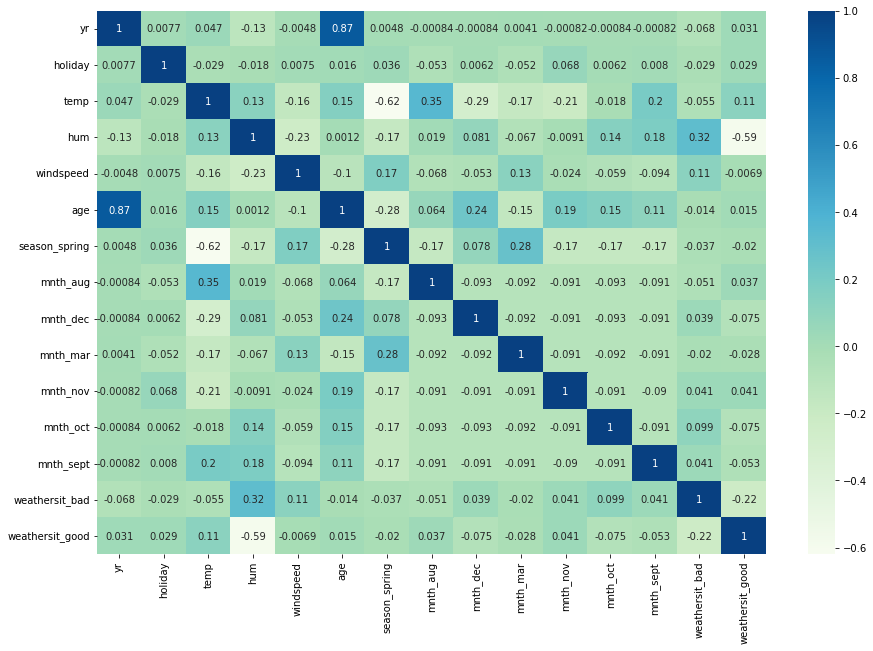

In [60]:
# Checking correlation of features selected by RFE.
plt.figure(figsize = (15,10))
sns.heatmap(df[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'age', 'season_spring',
       'mnth_aug', 'mnth_dec', 'mnth_mar', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']].corr(), cmap='GnBu', annot=True)
plt.show()

Inference:
Age is highly correlated with Yr and has very high VIF. Hence Drop age column

6.2 Model 2

In [113]:
#Selected columns for Model 2 - drop age from model 1
cols = ['yr','holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'mnth_aug', 'mnth_dec', 'mnth_mar', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     169.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          2.59e-178
Time:                        14:10:40   Log-Likelihood:                -4122.1
No. Observations:                 509   AIC:                             8274.
Df Residuals:                     494   BIC:                             8338.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2924.1532    278.451     

Inference: Mnth_Aug, Mnth_Dec, Mnth_Nov has high P value. Dropping Mnth_dec as it has highest P value

6.3 Model 3

In [114]:
#Selected columns for Model 3 - drop Mnth_Dec from model 2
cols = ['yr','holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'mnth_aug', 'mnth_mar', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.9
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.88e-179
Time:                        14:16:46   Log-Likelihood:                -4122.1
No. Observations:                 509   AIC:                             8272.
Df Residuals:                     495   BIC:                             8332.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2922.1428    267.164     

Inference: Inference: Mnth_Aug, Mnth_Nov has high P value. Dropping Mnth_Aug as it has highest P value




6.4 Model 4

In [115]:
#Selected columns for Model 4 - drop Mnth_Aug from model 3
cols = ['yr','holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'mnth_mar', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.39e-180
Time:                        14:18:43   Log-Likelihood:                -4122.2
No. Observations:                 509   AIC:                             8270.
Df Residuals:                     496   BIC:                             8325.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2915.1184    266.248     

Inference:
Drop Mnth_Nov as its P values > 0.05

6.5 Model 5

In [117]:
#Selected columns for Model 5 - drop Mnth_Nov from model 4
cols = ['yr','holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     216.9
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.01e-181
Time:                        14:21:10   Log-Likelihood:                -4122.3
No. Observations:                 509   AIC:                             8269.
Df Residuals:                     497   BIC:                             8319.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2947.4451    254.945     

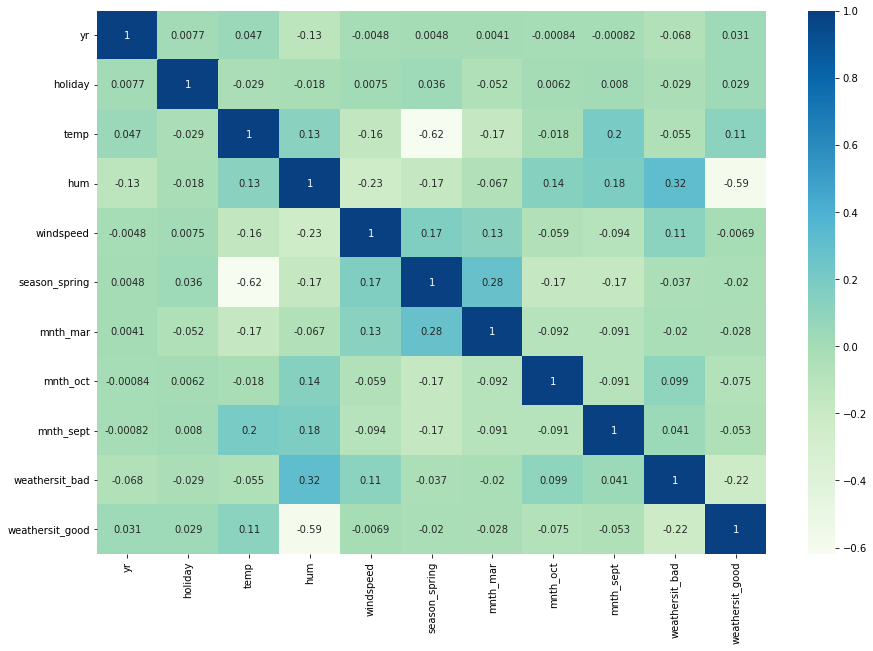

In [123]:
# Checking correlation of features selected by Model. 
plt.figure(figsize = (15,10))
sns.heatmap(df[['yr','holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']].corr(), cmap='GnBu', annot=True)
plt.show()

Inference: temp is highly correlated with other features. Its VIF is high so drop it

6.6 Model 6

In [126]:
#Selected columns for Model 6 - drop 'temp' from model 5
cols = ['yr','holiday', 'hum', 'windspeed', 'season_spring',
       'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     162.3
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.14e-149
Time:                        14:33:27   Log-Likelihood:                -4200.9
No. Observations:                 509   AIC:                             8424.
Df Residuals:                     498   BIC:                             8470.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4469.8857    266.102     

Inference: R value is going significantly down from 0.82 to 0.76 it is due to effect of temperature on target variable. Hence rather than dropping temperature from Model 5 drop Humidity as it has also high VIF

6.7 Model 7

In [128]:
#Selected columns for Model 7 - drop 'hum' from model 5
cols = ['yr','holiday', 'temp', 'windspeed', 'season_spring',
       'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     229.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          2.68e-179
Time:                        14:38:32   Log-Likelihood:                -4130.9
No. Observations:                 509   AIC:                             8284.
Df Residuals:                     498   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2192.0613    180.060     

Inference: Temp has high VIF but since Temp is highly correlated with target and R value decreases when we drop as seen earlier. We will drop feature with second highest VIF which is windspeed

6.8 Model 8

In [131]:
#Selected columns for Model 8 - drop 'windspeed' from model 7
cols = ['yr','holiday', 'temp', 'season_spring',
       'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     242.1
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          9.03e-176
Time:                        14:43:14   Log-Likelihood:                -4142.0
No. Observations:                 509   AIC:                             8304.
Df Residuals:                     499   BIC:                             8346.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1742.6174    156.170     

Inference:
1) VIF values are in acceptable range
2) P values are less than 0.05
3) R square and Adj R Square is high and difference between them is very less
4) F statistic is good
Considering all these lets model no 8 is good enough to go

In [133]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [134]:
#Let us build the finalmodel using sklearn
cols = ['yr','holiday', 'temp', 'season_spring',
       'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1742.6174326979653 [ 2084.05390032  -882.56499281  2887.28648128 -1544.77803171
   597.6511408    683.10240245   640.23300816 -1542.08598854
   731.15138608]


#7.Model Evaluation

7.1 Checking Data on Test Dataset

In [136]:
#Scale variables in X_test
num_vars = ['temp','hum','windspeed','age']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [137]:
#Columns from our final model
cols = ['yr','holiday', 'temp', 'season_spring',
       'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [138]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.812613677147148

Inference: R square is high so model has predicted correctly

7.2 Residual analysis

In [142]:
y_train_pred = lr.predict(X_train[cols])

In [140]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

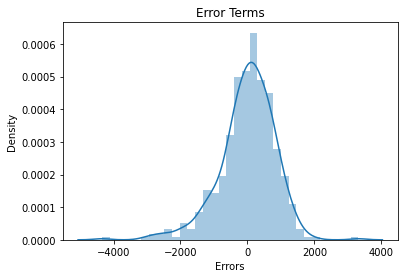

In [143]:
plot_res_dist(y_train, y_train_pred)

Inference: Errors are normally distributed with mean as 0. So model seems fine

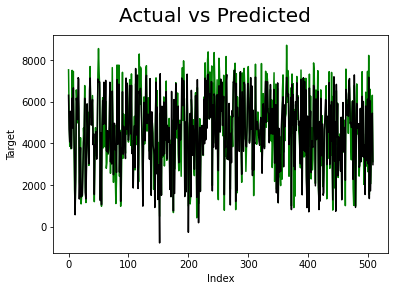

In [144]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="green")
plt.plot(c,y_train_pred, color="black")
plt.suptitle('Actual vs Predicted', fontsize = 20)
plt.xlabel('Index')
plt.ylabel('Target')
plt.show()

Inference: Predicted values are almost close to actual values so model seems fine

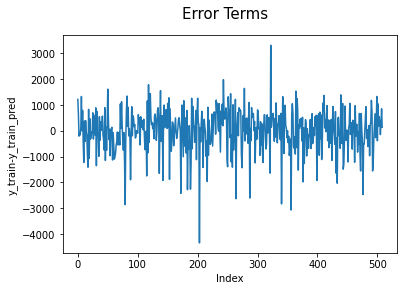

In [145]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Error terms are independent of Each other

In [146]:
#R-squared Value is high so model seems fine
r2_score(y_train,y_train_pred)

0.8136794881305847

7.3 Linearity Check

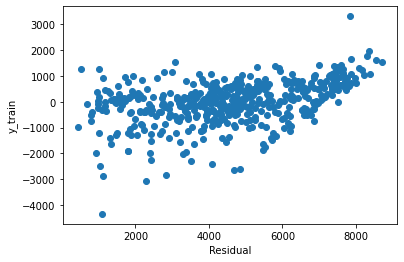

In [147]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

7.4 Homoscedacity

R2 value for predictions on test data is almost same as R2 value of train data.hence we can see our model is performing good

Text(0, 0.5, 'y_test_pred')

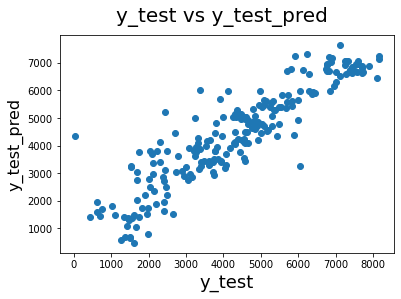

In [148]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

In [149]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

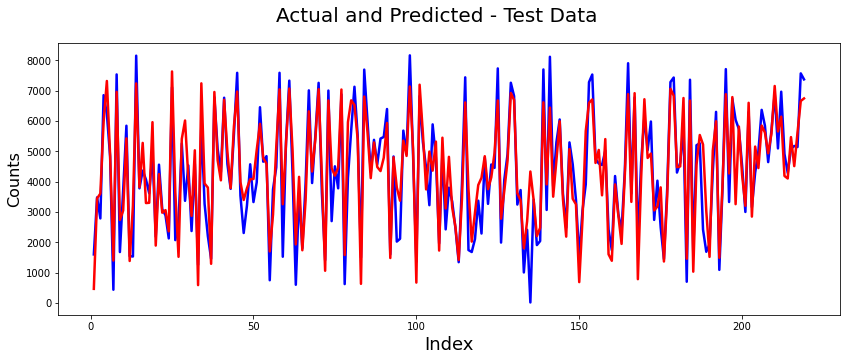

In [150]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

Inference: Test Data predicted value is close to Actual value

7.5 Distribution of Error terms

In [151]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

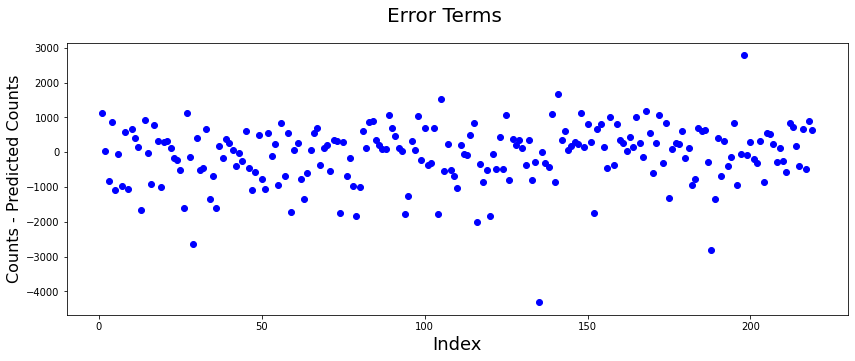

In [152]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

Inference: Error Terms are randomly distributed and there is no such pattern. This proves our model is a good fit

#8.Final Interpretation and Conclusion

In [153]:
#Lets take our model again
cols = ['yr','holiday', 'temp', 'season_spring',
       'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']
lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     242.1
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          9.03e-176
Time:                        15:22:44   Log-Likelihood:                -4142.0
No. Observations:                 509   AIC:                             8304.
Df Residuals:                     499   BIC:                             8346.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1742.6174    156.170     

#Conclusion

1) The Company's business is performing well in the Month of March, September, october as it has high positive correlation

2) Weather plays an important role too. Good weather leads to increase bike sharing as the coefficient is positive while bad weather impacts bike sharing as coefficient is negative. It might be because people would prefer own vehicle in bad weather due to uncertainity or company is not able to provide its service properly in the bad weather. So company should focus on improving its service in bad weather so that people can use it as much as possible

3) Company should focus on advertising in spring season as company is not performing well in spring season (coefficient being negative).

4) Temperature plays a critical role in demand generation (high positive correlation coeffient or slope). Demand rises with the temperature and that proves point no 3 too as in spring season temperature is lower. So company should target hot areas and keeps maximum bikes to full fil the demand in those areas

5) The Outlook is positive is the new year (high positive correlation coefficient or slope), so company should expand its facilities to fulfill the demand